## Tables preprocessing, variables determinition and packages loading

In [16]:
import pandas as pd
import numpy as np
import scipy
from scipy.sparse import csr_array
import anndata as ad
from matplotlib import pyplot as plt
from sklearn import preprocessing
import snapatac2 as snap
from scipy.sparse import csr_matrix
from matplotlib import colors
from scipy.sparse import load_npz


import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

fragments_numbers = [2000,4000]

In [39]:
## ids of the samples included in the analysis

ids = 'ENCSR007QIO'

In [45]:
## path (or paths) to the files with counted scATAC fragmentsin total and fragments, overlapped by a DHS peak

counts_path = '/count/path/'

In [46]:
## path to the input data

input_path = '/input/path/'

In [47]:
## input files names

input_file = ids+'.barcodes.npz'
barcodes_map = ids+ '.unique_barcodes.map'
index_mapping = 'index_mapping.txt'

In [48]:
meta_data = pd.read_csv(counts_path + ids +'_barcodes_peaks_counted', sep = '\t', header = None)
meta_data['ID'] = meta_data[0].apply(lambda x: x[:x.find('_')])
meta_data = meta_data.rename(columns={1:'#_of_detectesd_scATAC_fragments'})
meta_data

,0,#_of_detectesd_scATAC_fragments,ID
0,ENCSR007QIO_AAATCCGCATAAACCTAAGTGG,7,ENCSR007QIO
1,ENCSR007QIO_AAATCCGCATAAACGTCCCGTT,2,ENCSR007QIO
2,ENCSR007QIO_AAATCCGCATAAAGCACTAGCG,8,ENCSR007QIO
3,ENCSR007QIO_AAATCCGCATAAAGCCCACGAC,1,ENCSR007QIO
4,ENCSR007QIO_AAATCCGCATAAAGCGGGAGCT,1,ENCSR007QIO
...,...,...,...
53083,ENCSR007QIO_TTCGTCCGACTTTCCACGCAGT,1,ENCSR007QIO
53084,ENCSR007QIO_TTCGTCCGACTTTCGCGTGTAA,2,ENCSR007QIO
53085,ENCSR007QIO_TTCGTCCGACTTTCTGGCGCAG,3,ENCSR007QIO
53086,ENCSR007QIO_TTCGTCCGACTTTGCCGGAAGG,3,ENCSR007QIO


## Clusterization based on QC metrics

In [49]:
data = load_npz(input_path + input_file)
chunks_classes = np.loadtxt(input_path + index_mapping, dtype = 'str')
cells = np.loadtxt(input_path + barcodes_map, dtype = 'str')

In [50]:
adata = ad.AnnData(data)
adata.var_names = cells
adata.obs_names = chunks_classes

In [51]:
data_csr = csr_matrix(adata.X)
adata_csr = ad.AnnData(data_csr)
type(adata_csr.X)

scipy.sparse._csr.csr_matrix

In [52]:
adata = ad.AnnData(data)
adata.var_names = cells
adata.obs_names = chunks_classes
data_csr = csr_matrix(adata.X)
adata_csr = ad.AnnData(data_csr)
adata_csr.var_names = cells
adata_csr.obs_names = chunks_classes

In [59]:
adata_csr.write(input_path + ids + '_adata.h5ad', compression="gzip")

In [60]:
adata_csr = ad.read(input_path + ids + '_adata.h5ad')

adata_csr

AnnData object with n_obs × n_vars = 5862 × 53097

In [53]:
adata_csr.to_df()

,ENCSR007QIO_AAATCCGCATAAACCTAAGTGG,ENCSR007QIO_AAATCCGCATAAACGTCCCGTT,ENCSR007QIO_AAATCCGCATAAAGCACTAGCG,ENCSR007QIO_AAATCCGCATAAAGCCCACGAC,ENCSR007QIO_AAATCCGCATAAAGCGGGAGCT,ENCSR007QIO_AAATCCGCATAAAGGAACAGAC,ENCSR007QIO_AAATCCGCATAAAGGATCGGCT,ENCSR007QIO_AAATCCGCATAAAGGGATGCCA,ENCSR007QIO_AAATCCGCATAAATAAGGCCAG,ENCSR007QIO_AAATCCGCATAAATGCTACGGG,...,ENCSR007QIO_TTCGTCCGACTTGTCCTCGACG,ENCSR007QIO_TTCGTCCGACTTGTCTCTTGGG,ENCSR007QIO_TTCGTCCGACTTGTTCCTCTGC,ENCSR007QIO_TTCGTCCGACTTTAACGCCTCT,ENCSR007QIO_TTCGTCCGACTTTACCCGTCGA,ENCSR007QIO_TTCGTCCGACTTTCCACGCAGT,ENCSR007QIO_TTCGTCCGACTTTCGCGTGTAA,ENCSR007QIO_TTCGTCCGACTTTCTGGCGCAG,ENCSR007QIO_TTCGTCCGACTTTGCCGGAAGG,ENCSR007QIO_TTCGTCCGACTTTGTGTTACCG
chr1:792500-1000000,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
chr1:1000001-1500000,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:1500001-2000000,0,0,0,0,0,0,1,0,0,0,...,0,0,3,0,0,0,0,0,0,0
chr1:2000001-2500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:2500001-3000000,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9:137722200-137841200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr9:137846800-138000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr9:138000001-138222000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr9:138394700-138394717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
for i in fragments_numbers:
   adata_csr_sample =  adata_csr[:,meta_data.loc[meta_data['#_of_detectesd_scATAC_fragments'] >= i, 0]]
   adata_csr_sample_transponated = adata_csr_sample.copy().T
   snap.pp.scrublet(adata_csr_sample_transponated, features = None, n_jobs=20)
   snap.pp.filter_doublets(adata_csr_sample_transponated)
   adata_selection = snap.pp.select_features(adata_csr_sample_transponated, filter_upper_quantile=0.05, filter_lower_quantile=0.05, inplace = False)
   adata_csr_sample_selected = adata_csr_sample_transponated[:,adata_selection]
   snap.pp.select_features(adata_csr_sample_selected, filter_upper_quantile=0.05, filter_lower_quantile=0.05)
   snap.tl.spectral(adata_csr_sample_selected)
   snap.tl.umap(adata_csr_sample_selected)
   snap.pp.knn(adata_csr_sample_selected)
   snap.tl.leiden(adata_csr_sample_selected, resolution = 0.5)
   snap.pl.umap(adata_csr_sample_selected, color='leiden', interactive=False, height=750, width=1000, out_file=ids+'_'+str(i)+'_fragments_leiden_plot.pdf')

   adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] = meta_data.loc[meta_data[0].isin(adata_csr_sample_selected.obs.index), '#_of_detectesd_scATAC_fragments'].values
   adata_csr_sample_selected.obs['_of_detectesd_scATAC_fragments_groups'] = ''
   adata_csr_sample_selected.obs.loc[adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] <= 3000, '#_of_detectesd_scATAC_fragments_groups'] = '<= 3000 fragments per cell'
   adata_csr_sample_selected.obs.loc[(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] <= 5000)&(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] > 3000), '#_of_detectesd_scATAC_fragments_groups'] = '> 3000 and <= 5000 fragments per cell'
   adata_csr_sample_selected.obs.loc[(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] <= 7500)&(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] > 5000), '#_of_detectesd_scATAC_fragments_groups'] = '> 5000 and <= 7500 fragments per cell'    
   adata_csr_sample_selected.obs.loc[(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] <= 10000)&(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] > 7500), '#_of_detectesd_scATAC_fragments_groups'] = '> 7500 and <= 10000 fragments per cell'
   adata_csr_sample_selected.obs.loc[(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] <= 20000)&(adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] > 10000), '#_of_detectesd_scATAC_fragments_groups'] = '> 10000 and <= 20000 fragments per cell'
   adata_csr_sample_selected.obs.loc[adata_csr_sample_selected.obs['#_of_detectesd_scATAC_fragments'] > 20000, '#_of_detectesd_scATAC_fragments_groups'] = '> 20000 fragments per cell'    
   snap.pl.umap(adata_csr_sample_selected, color='_of_detectesd_scATAC_fragments_groups', interactive=False, height=750, width=1200, out_file=ids+'_'+str(i)+'_fragments_number_of_fragments_plot.pdf')

2024-07-13 07:04:29 - INFO - Simulating doublets...
2024-07-13 07:04:31 - INFO - Spectral embedding ...
2024-07-13 07:05:00 - INFO - Calculating doublet scores...
2024-07-13 07:05:20 - INFO - Detected doublet rate = 4.967%
2024-07-13 07:05:20 - INFO - Selected 5210 features.
/home/apetukhova/anaconda3/lib/python3.9/site-packages/snapatac2/preprocessing/_basic.py:856: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

2024-07-13 07:05:21 - INFO - Selected 4690 features.
/home/apetukhova/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

2024-07-13 07:06:11 - INFO - Simulating doublets...
2024-07-13 07:06:11 - INFO - Spectral embedding ...
2024-07-13 07:06:17 - INFO - Calculating doublet scores...
2024-07-13 07:06:19 - INFO - Detected doublet rate = 1.411%
2024-07-13 07:06:19 - INFO - Selected 5208 features.
/home/apetukhova/anaco

2024-07-13 07:06:37 - INFO - maxp pruned
2024-07-13 07:06:37 - INFO - cmap pruned
2024-07-13 07:06:37 - INFO - kern dropped
2024-07-13 07:06:37 - INFO - post pruned
2024-07-13 07:06:37 - INFO - FFTM dropped
2024-07-13 07:06:37 - INFO - GPOS pruned
2024-07-13 07:06:37 - INFO - GSUB pruned
2024-07-13 07:06:37 - INFO - glyf pruned
2024-07-13 07:06:37 - INFO - Added gid0 to subset
2024-07-13 07:06:37 - INFO - Added first four glyphs to subset
2024-07-13 07:06:37 - INFO - Closing glyph list over 'GSUB': 30 glyphs before
2024-07-13 07:06:37 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'N', 'T', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'six', 'space', 't', 'two', 'u', 'zero']
2024-07-13 07:06:37 - INFO - Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 23, 25, 27, 36, 38, 49, 55, 68, 69, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88]
2024-07-13 07:06:37 - INFO - Closed glyph list over 'GSUB': 35 glyphs after
2024-0

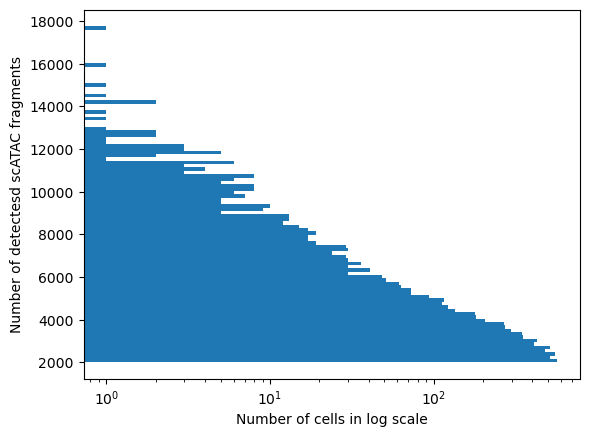

In [55]:
fig, ax = plt.subplots()
ax.hist(meta_data.loc[meta_data['#_of_detectesd_scATAC_fragments'] >= 2000,'#_of_detectesd_scATAC_fragments'], bins = 100, orientation = "horizontal")
ax.set_xscale('log')
plt.ylabel('Number of detectesd scATAC fragments')
plt.xlabel('Number of cells in log scale')
plt.savefig(ids+'_cells_more_than_2000_fragments_hist_log.pdf')
plt.show()

2024-07-13 07:06:38 - INFO - maxp pruned
2024-07-13 07:06:38 - INFO - cmap pruned
2024-07-13 07:06:38 - INFO - kern dropped
2024-07-13 07:06:38 - INFO - post pruned
2024-07-13 07:06:38 - INFO - FFTM dropped
2024-07-13 07:06:38 - INFO - GPOS pruned
2024-07-13 07:06:38 - INFO - GSUB pruned
2024-07-13 07:06:38 - INFO - glyf pruned
2024-07-13 07:06:38 - INFO - Added gid0 to subset
2024-07-13 07:06:38 - INFO - Added first four glyphs to subset
2024-07-13 07:06:38 - INFO - Closing glyph list over 'GSUB': 34 glyphs before
2024-07-13 07:06:38 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'N', 'T', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'zero']
2024-07-13 07:06:38 - INFO - Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 38, 49, 55, 68, 69, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88]
2024-07-13 07:06:38 - INFO - Clo

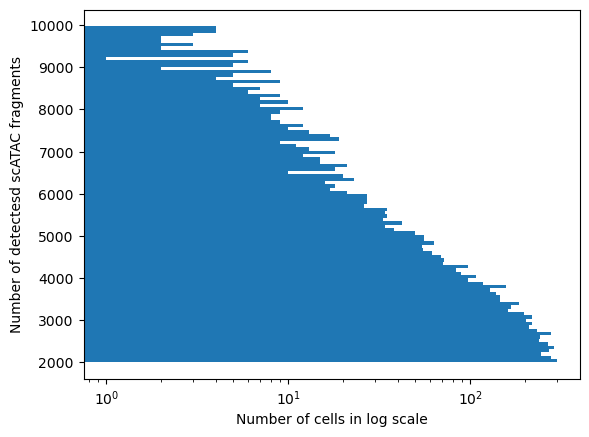

In [56]:
fig, ax = plt.subplots()
ax.hist(meta_data.loc[(meta_data['#_of_detectesd_scATAC_fragments'] >= 2000)&(meta_data['#_of_detectesd_scATAC_fragments'] <= 10000),'#_of_detectesd_scATAC_fragments'], bins = 100, orientation =
 "horizontal")
ax.set_xscale('log')
plt.ylabel('Number of detectesd scATAC fragments')
plt.xlabel('Number of cells in log scale')
plt.savefig(ids+'_cells_more_than_2000_and_less_than_10000_fragments_hist_log.pdf')
plt.show()

2024-07-13 07:06:38 - INFO - maxp pruned
2024-07-13 07:06:38 - INFO - cmap pruned
2024-07-13 07:06:38 - INFO - kern dropped
2024-07-13 07:06:38 - INFO - post pruned
2024-07-13 07:06:38 - INFO - FFTM dropped
2024-07-13 07:06:38 - INFO - GPOS pruned
2024-07-13 07:06:38 - INFO - GSUB pruned
2024-07-13 07:06:38 - INFO - glyf pruned
2024-07-13 07:06:38 - INFO - Added gid0 to subset
2024-07-13 07:06:38 - INFO - Added first four glyphs to subset
2024-07-13 07:06:38 - INFO - Closing glyph list over 'GSUB': 33 glyphs before
2024-07-13 07:06:38 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'N', 'T', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'zero']
2024-07-13 07:06:38 - INFO - Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 38, 49, 55, 68, 69, 70, 71, 72, 73, 74, 79, 80, 81, 82, 85, 86, 87, 88]
2024-07-13 07:06:38 - INFO - Closed glyph

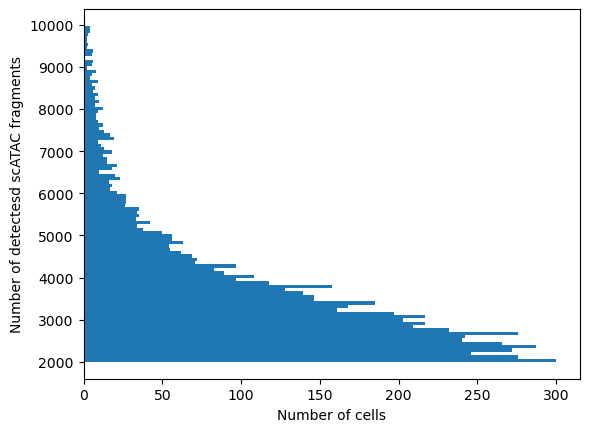

In [57]:
fig, ax = plt.subplots()
ax.hist(meta_data.loc[(meta_data['#_of_detectesd_scATAC_fragments'] >= 2000)&(meta_data['#_of_detectesd_scATAC_fragments'] <= 10000),'#_of_detectesd_scATAC_fragments'], bins = 100, orientation = "horizontal")
plt.ylabel('Number of detectesd scATAC fragments')
plt.xlabel('Number of cells')
plt.savefig(ids+'_cells_more_than_2000_and_less_than_10000_fragments_hist.pdf')
plt.show()